In [75]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import Common_Functions as cmn

# Combine All Regressions into one Graph

In [76]:
sns.set_context("poster")
sns.set_style("ticks")

In [77]:
observed_price = cmn.get_stringless_training_data()
prices = observed_price.iloc[:,-1:]
rf = pd.read_csv("Exported_Data/RandomForestPrediction.csv")
prices["RF"] = rf.iloc[:,-1:]

gbr = pd.read_csv("Exported_Data/GBR.csv")
prices["GBR"] = gbr.iloc[:,-1:]

ols = pd.read_csv("Exported_Data/OLS.csv")
prices["OLS"] = ols.iloc[:,-1:]

xgb = pd.read_csv("Exported_Data/XGB.csv")
prices["XGB"] = xgb.iloc[:,-1:]

prices.head(10)

,SalePrice,RF,GBR,OLS,XGB
0,208500,201605.405644,200987.035582,227243.598710,203864.280
1,181500,167914.166931,166379.335089,196355.868944,166006.050
2,223500,213785.525125,211539.116328,222831.166926,217937.500
3,140000,180254.549919,177405.974292,199358.318716,176473.830
4,250000,293904.255031,291051.111189,295552.240770,286894.940
5,143000,163914.319744,160366.658434,178645.733189,158264.860
6,307000,290624.806044,295582.817054,272538.422890,304965.160
7,200000,205306.786794,209634.481749,251870.815786,224092.600
8,129900,164165.078550,163532.896148,189753.427301,166114.940
9,118000,121912.664944,119945.073066,83918.353787,117998.414


<AxesSubplot:>

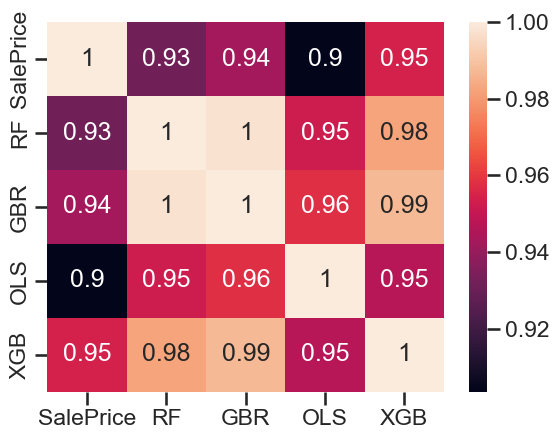

In [78]:
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(prices.corr().abs(),  annot=True)

<AxesSubplot:title={'center':'All Regression Pricing Predictions Compared to the Original Dataset'}, xlabel='Sample Number', ylabel='House Price'>

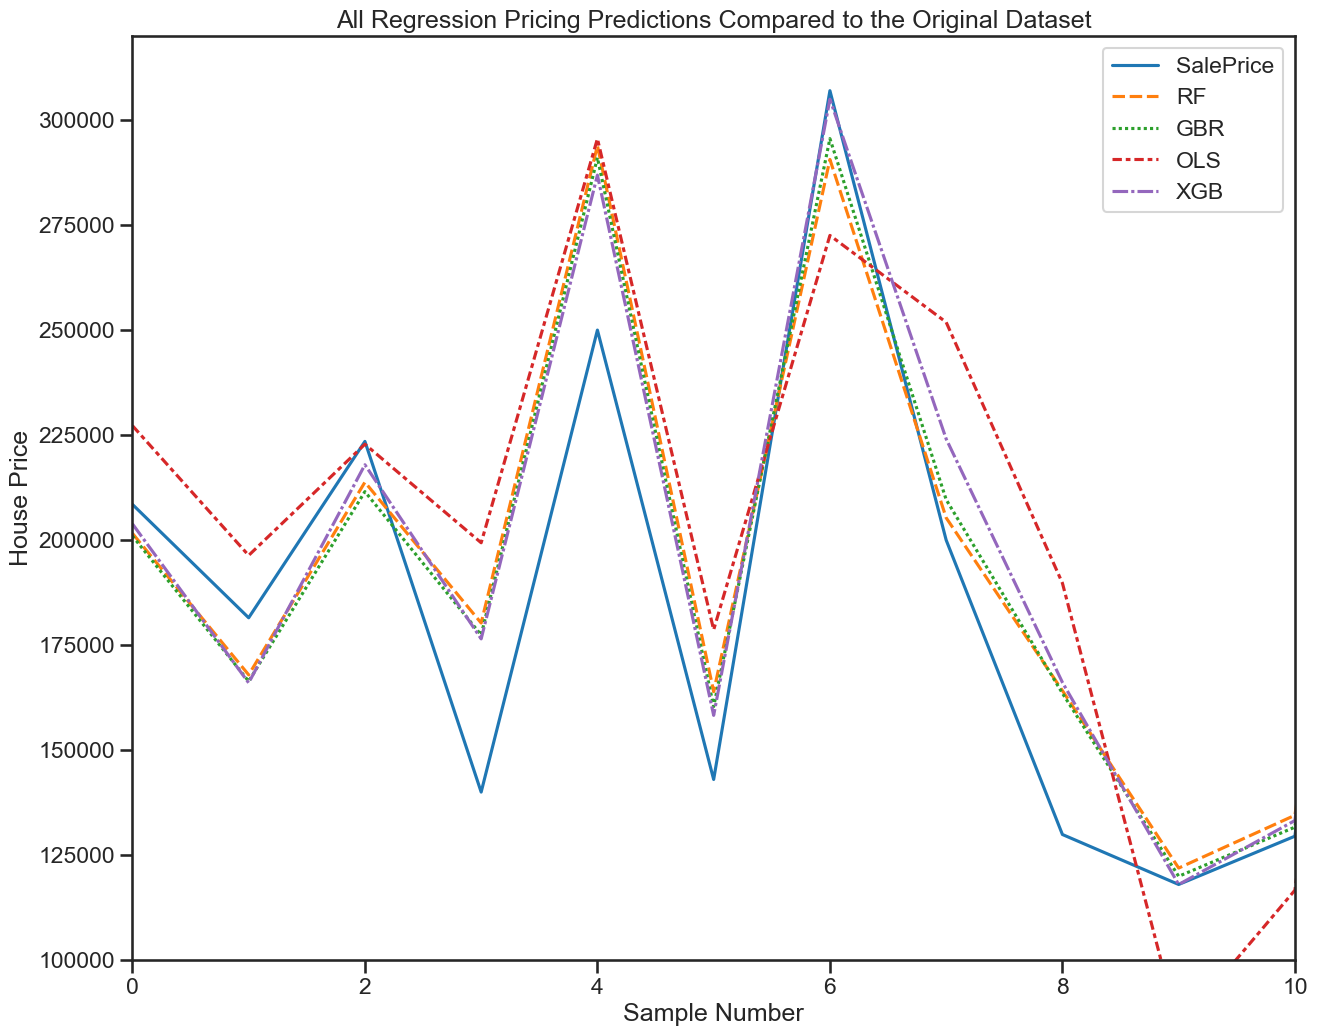

In [79]:
fig, ax = plt.subplots(figsize=(15, 12))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 10)
plt.ylim(100000, 320000)
#plt.tight_layout()
plt.title("All Regression Pricing Predictions Compared to the Original Dataset")
# always label your axes
plt.xlabel(r"Sample Number")
plt.ylabel(r"House Price")
sns.lineplot(data=prices)

Text(0, 0.5, 'House Price')

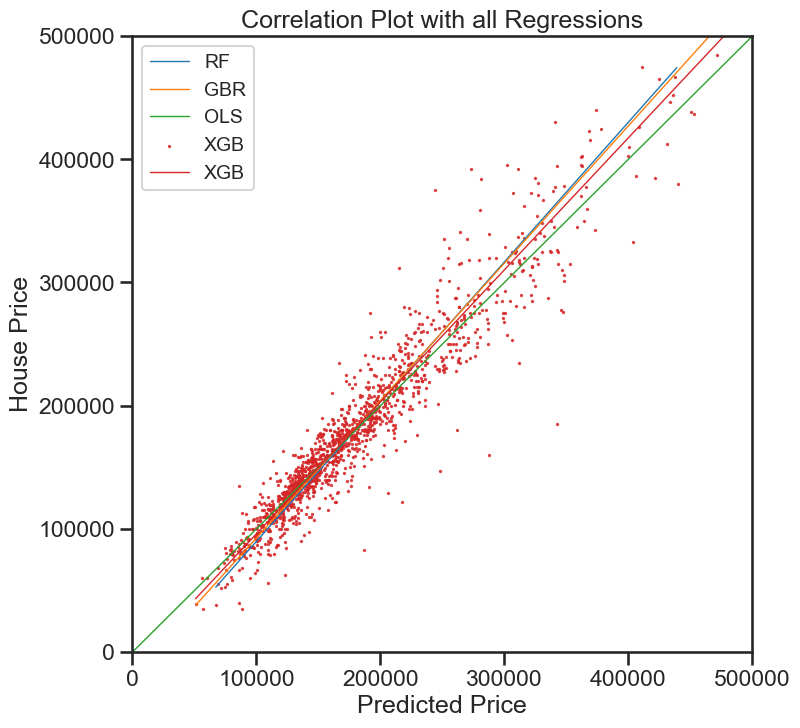

In [80]:
fig, ax = plt.subplots(figsize=(8, 8))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 500000)
plt.ylim(0, 500000)
#plt.tight_layout()
plt.title("Correlation Plot with all Regressions")
# always label your axes


sns.regplot(data=prices, x=prices.iloc[:,1:2], y="SalePrice", scatter=False, label="RF", ci=None, scatter_kws={'s':5}, marker=".", line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.iloc[:,2:3], y="SalePrice", scatter=False, label="Gradient Boosted Regressor", ci=None, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.iloc[:,3:4], y="SalePrice", scatter=False, label="OLS", ci=None, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.iloc[:,4:5], y="SalePrice", scatter=True, label="XGB", ci=None, scatter_kws={'s':2}, line_kws={"linewidth":1})

plt.legend(labels=["RF", "GBR", "OLS", "XGB", "XGB",], prop={'size': 14})
plt.xlabel(r"Predicted Price")
plt.ylabel(r"House Price")

In [81]:
# fig, ax = plt.subplots(figsize=(8, 8))
# #ax = sns.lineplot(prices)
#
# #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#
# #create a legend
# plt.xlim(0, 500000)
# plt.ylim(0, 500000)
# #plt.tight_layout()
# plt.title("Correlation Plot with all Regressions")
# # always label your axes
#
# # sample data, reduce amount of dots
# df_sample=prices.sample(200)
#
# sns.regplot(data=df_sample, x=df_sample.iloc[:,1:2], y="SalePrice", label="RF", ci=None, scatter_kws={'s':5}, marker=".", line_kws={"linewidth":1})
# sns.regplot(data=df_sample, x=df_sample.iloc[:,2:3], y="SalePrice", scatter=True, scatter_kws={'s':5}, label="Gradient Boosted Regressor", ci=None, line_kws={"linewidth":1})
# sns.regplot(data=df_sample, x=df_sample.iloc[:,3:4], y="SalePrice", scatter=True, scatter_kws={'s':5}, label="OLS", ci=None, line_kws={"linewidth":1})
# sns.regplot(data=df_sample, x=df_sample.iloc[:,4:5], y="SalePrice", scatter=True, scatter_kws={'s':5}, label="XGB", ci=None, line_kws={"linewidth":1})
#
# plt.legend(labels=["Random Forest","Random Forest", "Gradient Boosted Regressor", "OLS", "XGB"], prop={'size': 14})
# plt.xlabel(r"Predicted Price")
# plt.ylabel(r"House Price")

# Weightings based on Perceived Accuracy

In [82]:
observed_price = cmn.get_stringless_training_data()
prices = observed_price.iloc[:,-1:]
rf = pd.read_csv("Exported_Data/RandomForestPrediction.csv")
prices["RF"] = rf.iloc[:,-1:]

gbr = pd.read_csv("Exported_Data/GBR.csv")
prices["GBR"] = gbr.iloc[:,-1:]

ols = pd.read_csv("Exported_Data/OLS.csv")
prices["OLS"] = ols.iloc[:,-1:]

xgb = pd.read_csv("Exported_Data/XGB.csv")
prices["XGB"] = xgb.iloc[:,-1:]

In [83]:
weight = [.93*2, .94*3, .9*1, .95*4]
columns = ["RF", "GBR", "OLS", "XGB"]
prices["Avg."] = np.average(prices[columns], weights=weight, axis=1)

prices.head(10)

,SalePrice,RF,GBR,OLS,XGB,Avg.
0,208500,201605.405644,200987.035582,227243.598710,203864.280,204794.562652
1,181500,167914.166931,166379.335089,196355.868944,166006.050,169408.672441
2,223500,213785.525125,211539.116328,222831.166926,217937.500,215660.121003
3,140000,180254.549919,177405.974292,199358.318716,176473.830,179699.504392
4,250000,293904.255031,291051.111189,295552.240770,286894.940,290365.014563
5,143000,163914.319744,160366.658434,178645.733189,158264.860,161972.520189
6,307000,290624.806044,295582.817054,272538.422890,304965.160,296189.538586
7,200000,205306.786794,209634.481749,251870.815786,224092.600,218686.084880
8,129900,164165.078550,163532.896148,189753.427301,166114.940,167220.114052
9,118000,121912.664944,119945.073066,83918.353787,117998.414,116089.888534


In [84]:
#prices["Weighted Average"] = (prices["Random Forest"]* 0.15)+ (prices["Gradient Boosted Regressor"]*0.2)+ (prices["OLS"]*0.05)+ (prices["XGB Regressor"]*0.6)

#prices.head(10)

<AxesSubplot:>

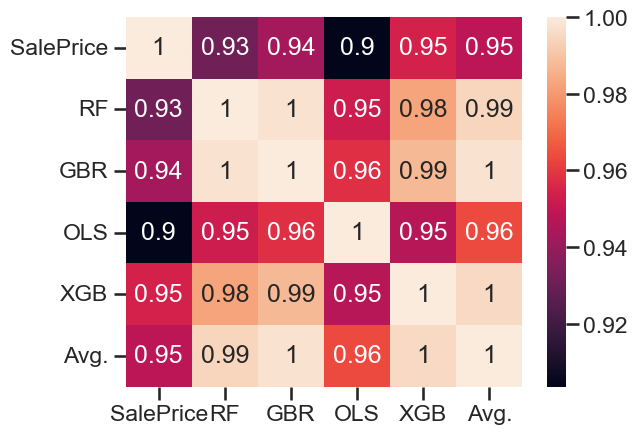

In [91]:
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(prices.corr().abs(),  annot=True)

<AxesSubplot:title={'center':'All Regression Pricing Predictions Compared to the Original Dataset'}, xlabel='Sample Number', ylabel='House Price'>

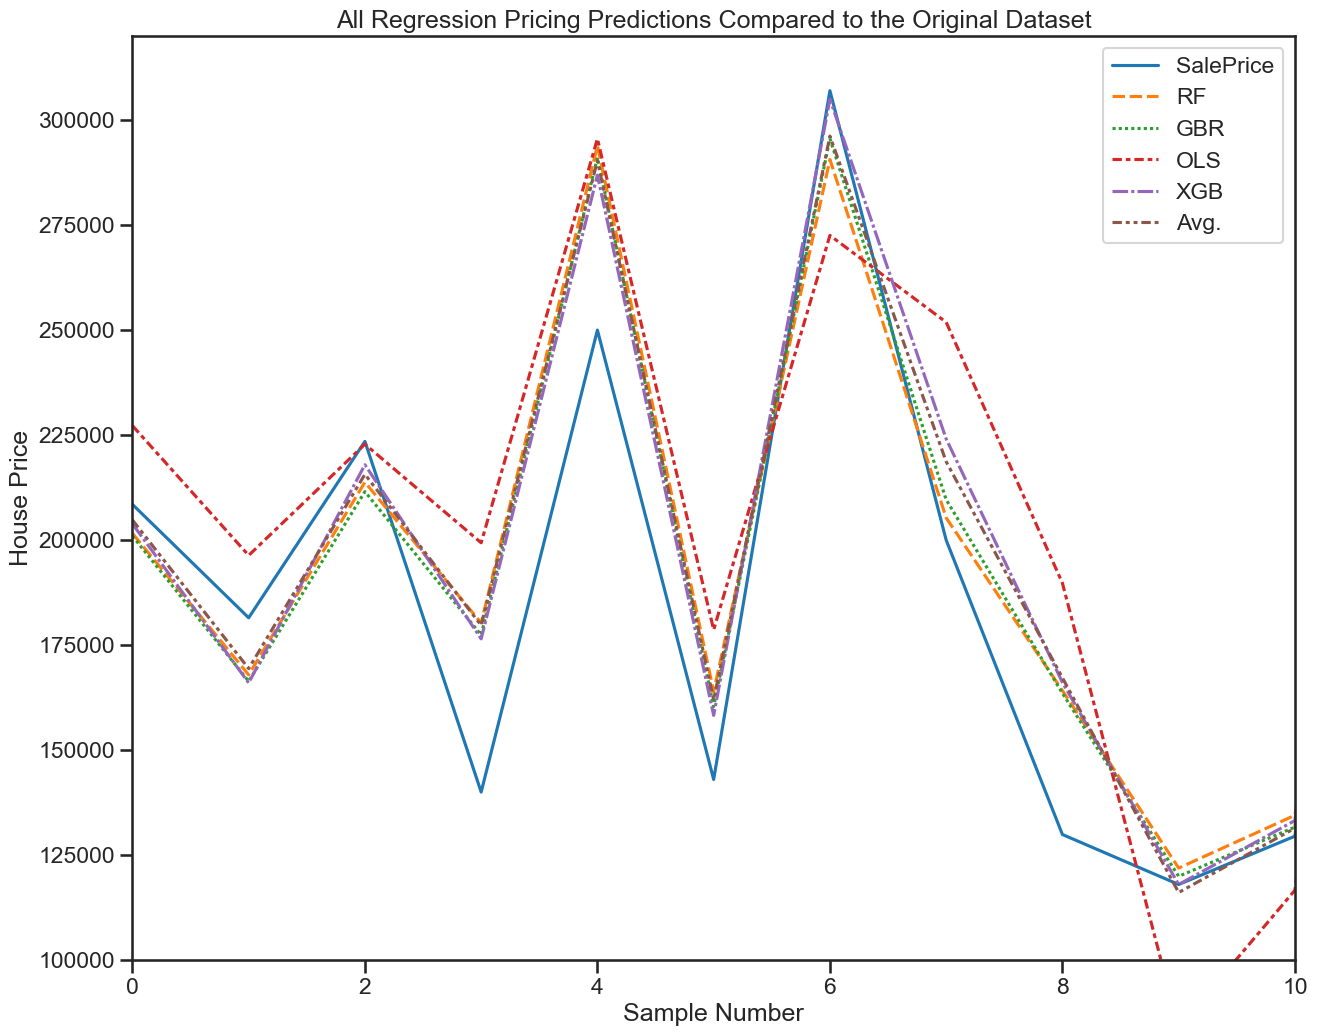

In [86]:
fig, ax = plt.subplots(figsize=(15, 12))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 10)
plt.ylim(100000, 320000)
#plt.tight_layout()
plt.title("All Regression Pricing Predictions Compared to the Original Dataset")
# always label your axes
plt.xlabel(r"Sample Number")
plt.ylabel(r"House Price")
sns.lineplot(data=prices)

# Correlation with Weighted Average

Text(0, 0.5, 'House Price')

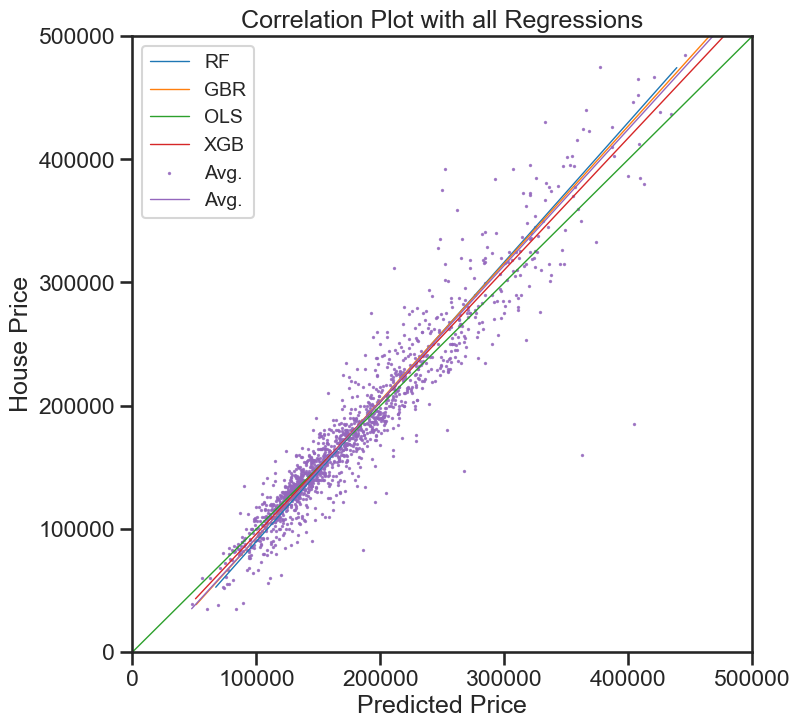

In [88]:
fig, ax = plt.subplots(figsize=(8, 8))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 500000)
plt.ylim(0, 500000)
#plt.tight_layout()
plt.title("Correlation Plot with all Regressions")
# always label your axes


sns.regplot(data=prices, x=prices.loc[:,"RF"], y="SalePrice", scatter=False, label="RF", ci=None, scatter_kws={'s':5}, marker=".", line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.loc[:,"GBR"], y="SalePrice", scatter=False, label="Gradient Boosted Regressor", ci=None, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.loc[:,"OLS"], y="SalePrice", scatter=False, label="OLS", ci=None, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.loc[:,"XGB"], y="SalePrice", scatter=False, label="XGB", ci=None, scatter_kws={'s':2}, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.loc[:,"Avg."], y="SalePrice", scatter=True, label="WA", ci=None, scatter_kws={'s':2}, line_kws={"linewidth":1})

plt.legend(labels=["RF", "GBR", "OLS", "XGB", "Avg.", "Avg."], prop={'size': 14})
plt.xlabel(r"Predicted Price")
plt.ylabel(r"House Price")

In [89]:
#weighted = prices["Weighted Average"]
weighted = pd.DataFrame(i for i in range(1461,2920))
weighted = weighted.rename(columns={0:'Id'})
weighted["SalePrice"] = prices['Avg.']
weighted = weighted.set_index("Id")

pd.DataFrame(weighted).to_csv(f"{cmn.export_data_path}Weighted Submission.csv")

# Testing
